In [59]:
# Libs initialization
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

In [22]:
path_to_file = r'C:\Users\sorok\Desktop\MTR\MTR_ITMO_2022\student-por.csv'
source_df = pd.read_csv(path_to_file)

In [23]:
source_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [51]:
df = source_df[['sex', 'absences', 'studytime', 'G1', 'G2', 'G3']]
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df = df.drop(['G1', 'G2', 'G3'], axis=1)
#df = df.sample(n = 15, random_state = 4)

C:\Users\sorok\AppData\Local\Temp\ipykernel_2056\3981797537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)


In [52]:
df

,sex,absences,studytime,avg_grade
0,F,4,2,7.333333
1,F,2,2,10.333333
2,F,6,2,12.333333
3,F,0,3,14.000000
4,F,0,2,12.333333
...,...,...,...,...
644,F,4,3,10.333333
645,F,4,2,15.333333
646,F,6,2,10.666667
647,M,6,1,10.000000


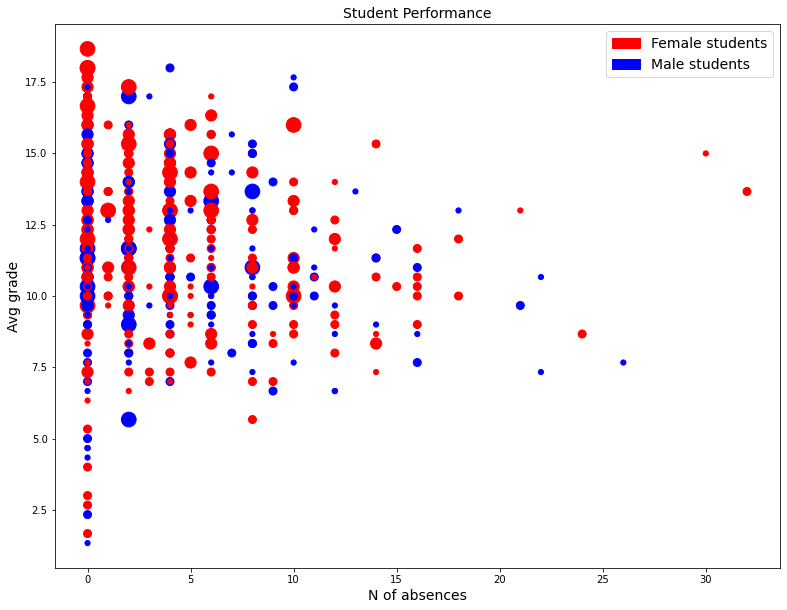

In [64]:
categories = df.sex.to_numpy()
categories = (categories == 'M').astype(int)

colormap = np.array(['r', 'b'])
plt.figure(figsize=(13,10))
plt.xlabel('N of absences', fontsize=14)
plt.ylabel('Avg grade', fontsize=14)
plt.title('Student Performance', fontsize=14)

red_patch = mpatches.Patch(color='red', label='Female students')
blue_patch = mpatches.Patch(color='blue', label='Male students')
plt.legend(handles=[red_patch, blue_patch], fontsize=14)

plt.scatter(df.absences, df.avg_grade, s = (df.studytime + 2) ** 3, c = colormap[categories])
